## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 48.8ms	remaining: 48.8s
1:	learn: 0.9301086	total: 51ms	remaining: 25.5s
2:	learn: 0.9005637	total: 53.1ms	remaining: 17.7s
3:	learn: 0.8720983	total: 55.4ms	remaining: 13.8s
4:	learn: 0.8467410	total: 57.3ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59.2ms	remaining: 9.81s
6:	learn: 0.7994702	total: 61.1ms	remaining: 8.66s
7:	learn: 0.7784272	total: 63.1ms	remaining: 7.82s
8:	learn: 0.7602192	total: 65.1ms	remaining: 7.16s
9:	learn: 0.7412421	total: 67.2ms	remaining: 6.65s
10:	learn: 0.7247930	total: 69.4ms	remaining: 6.24s
11:	learn: 0.7089951	total: 71.5ms	remaining: 5.89s
12:	learn: 0.6951345	total: 73.5ms	remaining: 5.58s
13:	learn: 0.6809276	total: 75.5ms	remaining: 5.32s
14:	learn: 0.6692630	total: 77.5ms	remaining: 5.09s
15:	learn: 0.6588323	total: 79.5ms	remaining: 4.89s
16:	learn: 0.6472700	total: 81.4ms	remaining: 4.71s
17:	learn: 0.6379982	total: 83.4ms	remaining: 4.55s
18:	learn: 0.6294674	total: 85.4ms	remaining: 4.41s
19:	learn: 0.6193295	tot

58:	learn: 0.4840055	total: 167ms	remaining: 2.66s
59:	learn: 0.4824455	total: 169ms	remaining: 2.65s
60:	learn: 0.4809744	total: 171ms	remaining: 2.63s
61:	learn: 0.4801376	total: 173ms	remaining: 2.62s
62:	learn: 0.4792422	total: 175ms	remaining: 2.6s
63:	learn: 0.4780719	total: 177ms	remaining: 2.59s
64:	learn: 0.4771984	total: 179ms	remaining: 2.58s
65:	learn: 0.4759610	total: 181ms	remaining: 2.56s
66:	learn: 0.4750287	total: 183ms	remaining: 2.55s
67:	learn: 0.4740093	total: 185ms	remaining: 2.54s
68:	learn: 0.4732612	total: 187ms	remaining: 2.52s
69:	learn: 0.4727266	total: 189ms	remaining: 2.51s
70:	learn: 0.4716549	total: 191ms	remaining: 2.5s
71:	learn: 0.4709088	total: 193ms	remaining: 2.49s
72:	learn: 0.4697594	total: 195ms	remaining: 2.48s
73:	learn: 0.4690934	total: 197ms	remaining: 2.47s
74:	learn: 0.4680942	total: 199ms	remaining: 2.46s
75:	learn: 0.4672726	total: 201ms	remaining: 2.44s
76:	learn: 0.4664479	total: 203ms	remaining: 2.43s
77:	learn: 0.4656044	total: 205ms

82:	learn: 0.4608838	total: 216ms	remaining: 2.38s
83:	learn: 0.4604376	total: 218ms	remaining: 2.38s
84:	learn: 0.4596603	total: 220ms	remaining: 2.37s
85:	learn: 0.4587835	total: 222ms	remaining: 2.36s
86:	learn: 0.4583577	total: 224ms	remaining: 2.35s
87:	learn: 0.4577999	total: 225ms	remaining: 2.33s
88:	learn: 0.4572657	total: 227ms	remaining: 2.33s
89:	learn: 0.4569360	total: 229ms	remaining: 2.32s
90:	learn: 0.4559969	total: 231ms	remaining: 2.31s
91:	learn: 0.4549716	total: 233ms	remaining: 2.3s
92:	learn: 0.4544919	total: 235ms	remaining: 2.29s
93:	learn: 0.4537693	total: 237ms	remaining: 2.29s
94:	learn: 0.4532673	total: 239ms	remaining: 2.28s
95:	learn: 0.4526987	total: 241ms	remaining: 2.27s
96:	learn: 0.4520952	total: 243ms	remaining: 2.26s
97:	learn: 0.4513919	total: 245ms	remaining: 2.25s
98:	learn: 0.4503747	total: 247ms	remaining: 2.25s
99:	learn: 0.4494783	total: 249ms	remaining: 2.24s
100:	learn: 0.4487329	total: 251ms	remaining: 2.23s
101:	learn: 0.4481325	total: 25

142:	learn: 0.4282748	total: 334ms	remaining: 2s
143:	learn: 0.4277528	total: 336ms	remaining: 2s
144:	learn: 0.4274087	total: 338ms	remaining: 1.99s
145:	learn: 0.4271984	total: 340ms	remaining: 1.99s
146:	learn: 0.4268458	total: 342ms	remaining: 1.98s
147:	learn: 0.4264987	total: 343ms	remaining: 1.98s
148:	learn: 0.4262192	total: 345ms	remaining: 1.97s
149:	learn: 0.4257966	total: 347ms	remaining: 1.97s
150:	learn: 0.4253062	total: 349ms	remaining: 1.96s
151:	learn: 0.4247446	total: 351ms	remaining: 1.96s
152:	learn: 0.4237365	total: 353ms	remaining: 1.95s
153:	learn: 0.4233079	total: 355ms	remaining: 1.95s
154:	learn: 0.4228876	total: 357ms	remaining: 1.95s
155:	learn: 0.4225404	total: 359ms	remaining: 1.94s
156:	learn: 0.4222831	total: 361ms	remaining: 1.94s
157:	learn: 0.4218088	total: 363ms	remaining: 1.93s
158:	learn: 0.4213239	total: 364ms	remaining: 1.93s
159:	learn: 0.4210022	total: 366ms	remaining: 1.92s
160:	learn: 0.4201256	total: 368ms	remaining: 1.92s
161:	learn: 0.4197

167:	learn: 0.4173026	total: 383ms	remaining: 1.9s
168:	learn: 0.4170486	total: 385ms	remaining: 1.89s
169:	learn: 0.4165960	total: 387ms	remaining: 1.89s
170:	learn: 0.4161870	total: 389ms	remaining: 1.89s
171:	learn: 0.4156228	total: 391ms	remaining: 1.88s
172:	learn: 0.4153041	total: 393ms	remaining: 1.88s
173:	learn: 0.4148857	total: 395ms	remaining: 1.87s
174:	learn: 0.4144190	total: 397ms	remaining: 1.87s
175:	learn: 0.4140875	total: 399ms	remaining: 1.87s
176:	learn: 0.4136755	total: 401ms	remaining: 1.86s
177:	learn: 0.4133860	total: 403ms	remaining: 1.86s
178:	learn: 0.4129780	total: 405ms	remaining: 1.85s
179:	learn: 0.4122907	total: 407ms	remaining: 1.85s
180:	learn: 0.4119188	total: 408ms	remaining: 1.85s
181:	learn: 0.4115412	total: 410ms	remaining: 1.84s
182:	learn: 0.4112620	total: 412ms	remaining: 1.84s
183:	learn: 0.4107734	total: 414ms	remaining: 1.84s
184:	learn: 0.4104881	total: 416ms	remaining: 1.83s
185:	learn: 0.4100009	total: 418ms	remaining: 1.83s
186:	learn: 0

226:	learn: 0.3968841	total: 500ms	remaining: 1.7s
227:	learn: 0.3965787	total: 502ms	remaining: 1.7s
228:	learn: 0.3963073	total: 505ms	remaining: 1.7s
229:	learn: 0.3960925	total: 507ms	remaining: 1.7s
230:	learn: 0.3957018	total: 509ms	remaining: 1.7s
231:	learn: 0.3954162	total: 512ms	remaining: 1.69s
232:	learn: 0.3951665	total: 514ms	remaining: 1.69s
233:	learn: 0.3949269	total: 516ms	remaining: 1.69s
234:	learn: 0.3945894	total: 518ms	remaining: 1.69s
235:	learn: 0.3944181	total: 521ms	remaining: 1.69s
236:	learn: 0.3941497	total: 523ms	remaining: 1.69s
237:	learn: 0.3939819	total: 526ms	remaining: 1.68s
238:	learn: 0.3938322	total: 528ms	remaining: 1.68s
239:	learn: 0.3935463	total: 531ms	remaining: 1.68s
240:	learn: 0.3933166	total: 533ms	remaining: 1.68s
241:	learn: 0.3930992	total: 535ms	remaining: 1.68s
242:	learn: 0.3928898	total: 537ms	remaining: 1.67s
243:	learn: 0.3926199	total: 540ms	remaining: 1.67s
244:	learn: 0.3923955	total: 542ms	remaining: 1.67s
245:	learn: 0.392

246:	learn: 0.3919499	total: 548ms	remaining: 1.67s
247:	learn: 0.3917420	total: 550ms	remaining: 1.67s
248:	learn: 0.3915186	total: 552ms	remaining: 1.67s
249:	learn: 0.3912759	total: 554ms	remaining: 1.66s
250:	learn: 0.3908375	total: 557ms	remaining: 1.66s
251:	learn: 0.3904815	total: 559ms	remaining: 1.66s
252:	learn: 0.3902127	total: 562ms	remaining: 1.66s
253:	learn: 0.3900274	total: 564ms	remaining: 1.66s
254:	learn: 0.3898171	total: 567ms	remaining: 1.66s
255:	learn: 0.3896180	total: 569ms	remaining: 1.65s
256:	learn: 0.3894251	total: 571ms	remaining: 1.65s
257:	learn: 0.3892139	total: 574ms	remaining: 1.65s
258:	learn: 0.3889352	total: 576ms	remaining: 1.65s
259:	learn: 0.3886531	total: 579ms	remaining: 1.65s
260:	learn: 0.3884539	total: 581ms	remaining: 1.64s
261:	learn: 0.3882459	total: 583ms	remaining: 1.64s
262:	learn: 0.3881101	total: 586ms	remaining: 1.64s
263:	learn: 0.3879324	total: 588ms	remaining: 1.64s
264:	learn: 0.3876861	total: 590ms	remaining: 1.64s
265:	learn: 

294:	learn: 0.3807825	total: 663ms	remaining: 1.58s
295:	learn: 0.3805940	total: 665ms	remaining: 1.58s
296:	learn: 0.3801959	total: 669ms	remaining: 1.58s
297:	learn: 0.3799439	total: 671ms	remaining: 1.58s
298:	learn: 0.3797228	total: 674ms	remaining: 1.58s
299:	learn: 0.3795554	total: 676ms	remaining: 1.58s
300:	learn: 0.3793733	total: 678ms	remaining: 1.57s
301:	learn: 0.3791607	total: 681ms	remaining: 1.57s
302:	learn: 0.3789297	total: 683ms	remaining: 1.57s
303:	learn: 0.3787482	total: 685ms	remaining: 1.57s
304:	learn: 0.3786528	total: 688ms	remaining: 1.57s
305:	learn: 0.3784406	total: 690ms	remaining: 1.56s
306:	learn: 0.3782934	total: 692ms	remaining: 1.56s
307:	learn: 0.3781631	total: 694ms	remaining: 1.56s
308:	learn: 0.3779278	total: 696ms	remaining: 1.56s
309:	learn: 0.3777358	total: 699ms	remaining: 1.55s
310:	learn: 0.3775809	total: 701ms	remaining: 1.55s
311:	learn: 0.3774323	total: 703ms	remaining: 1.55s
312:	learn: 0.3772732	total: 705ms	remaining: 1.55s
313:	learn: 

314:	learn: 0.3769370	total: 710ms	remaining: 1.54s
315:	learn: 0.3766643	total: 712ms	remaining: 1.54s
316:	learn: 0.3764891	total: 714ms	remaining: 1.54s
317:	learn: 0.3762751	total: 716ms	remaining: 1.54s
318:	learn: 0.3761284	total: 718ms	remaining: 1.53s
319:	learn: 0.3760168	total: 720ms	remaining: 1.53s
320:	learn: 0.3757763	total: 722ms	remaining: 1.53s
321:	learn: 0.3756076	total: 724ms	remaining: 1.52s
322:	learn: 0.3754123	total: 727ms	remaining: 1.52s
323:	learn: 0.3751852	total: 729ms	remaining: 1.52s
324:	learn: 0.3750004	total: 731ms	remaining: 1.52s
325:	learn: 0.3749086	total: 733ms	remaining: 1.52s
326:	learn: 0.3746654	total: 735ms	remaining: 1.51s
327:	learn: 0.3745405	total: 738ms	remaining: 1.51s
328:	learn: 0.3743710	total: 740ms	remaining: 1.51s
329:	learn: 0.3741679	total: 742ms	remaining: 1.51s
330:	learn: 0.3738646	total: 744ms	remaining: 1.5s
331:	learn: 0.3736647	total: 746ms	remaining: 1.5s
332:	learn: 0.3733429	total: 748ms	remaining: 1.5s
333:	learn: 0.3

369:	learn: 0.3671985	total: 828ms	remaining: 1.41s
370:	learn: 0.3670563	total: 830ms	remaining: 1.41s
371:	learn: 0.3669128	total: 832ms	remaining: 1.41s
372:	learn: 0.3668381	total: 835ms	remaining: 1.4s
373:	learn: 0.3666564	total: 837ms	remaining: 1.4s
374:	learn: 0.3663789	total: 839ms	remaining: 1.4s
375:	learn: 0.3661576	total: 841ms	remaining: 1.4s
376:	learn: 0.3659742	total: 843ms	remaining: 1.39s
377:	learn: 0.3658330	total: 846ms	remaining: 1.39s
378:	learn: 0.3656680	total: 848ms	remaining: 1.39s
379:	learn: 0.3654606	total: 850ms	remaining: 1.39s
380:	learn: 0.3651842	total: 852ms	remaining: 1.38s
381:	learn: 0.3650538	total: 854ms	remaining: 1.38s
382:	learn: 0.3649246	total: 856ms	remaining: 1.38s
383:	learn: 0.3647854	total: 858ms	remaining: 1.38s
384:	learn: 0.3646814	total: 860ms	remaining: 1.37s
385:	learn: 0.3645091	total: 862ms	remaining: 1.37s
386:	learn: 0.3643695	total: 864ms	remaining: 1.37s
387:	learn: 0.3641687	total: 866ms	remaining: 1.36s
388:	learn: 0.36

391:	learn: 0.3636336	total: 874ms	remaining: 1.35s
392:	learn: 0.3635003	total: 877ms	remaining: 1.35s
393:	learn: 0.3633029	total: 879ms	remaining: 1.35s
394:	learn: 0.3632136	total: 881ms	remaining: 1.35s
395:	learn: 0.3629529	total: 883ms	remaining: 1.35s
396:	learn: 0.3627743	total: 885ms	remaining: 1.34s
397:	learn: 0.3626747	total: 888ms	remaining: 1.34s
398:	learn: 0.3625881	total: 890ms	remaining: 1.34s
399:	learn: 0.3622963	total: 892ms	remaining: 1.34s
400:	learn: 0.3622314	total: 894ms	remaining: 1.33s
401:	learn: 0.3620143	total: 897ms	remaining: 1.33s
402:	learn: 0.3618403	total: 899ms	remaining: 1.33s
403:	learn: 0.3616747	total: 901ms	remaining: 1.33s
404:	learn: 0.3614255	total: 903ms	remaining: 1.33s
405:	learn: 0.3613607	total: 906ms	remaining: 1.32s
406:	learn: 0.3612875	total: 908ms	remaining: 1.32s
407:	learn: 0.3611516	total: 910ms	remaining: 1.32s
408:	learn: 0.3609621	total: 913ms	remaining: 1.32s
409:	learn: 0.3608193	total: 915ms	remaining: 1.32s
410:	learn: 

444:	learn: 0.3555934	total: 995ms	remaining: 1.24s
445:	learn: 0.3553700	total: 997ms	remaining: 1.24s
446:	learn: 0.3553048	total: 999ms	remaining: 1.24s
447:	learn: 0.3550824	total: 1s	remaining: 1.23s
448:	learn: 0.3549146	total: 1s	remaining: 1.23s
449:	learn: 0.3548607	total: 1.01s	remaining: 1.23s
450:	learn: 0.3546809	total: 1.01s	remaining: 1.23s
451:	learn: 0.3545787	total: 1.01s	remaining: 1.23s
452:	learn: 0.3544310	total: 1.01s	remaining: 1.22s
453:	learn: 0.3543210	total: 1.01s	remaining: 1.22s
454:	learn: 0.3541744	total: 1.02s	remaining: 1.22s
455:	learn: 0.3540636	total: 1.02s	remaining: 1.22s
456:	learn: 0.3538004	total: 1.02s	remaining: 1.21s
457:	learn: 0.3536614	total: 1.02s	remaining: 1.21s
458:	learn: 0.3534477	total: 1.03s	remaining: 1.21s
459:	learn: 0.3533592	total: 1.03s	remaining: 1.21s
460:	learn: 0.3532754	total: 1.03s	remaining: 1.21s
461:	learn: 0.3531467	total: 1.03s	remaining: 1.2s
462:	learn: 0.3529963	total: 1.03s	remaining: 1.2s


463:	learn: 0.3529036	total: 1.04s	remaining: 1.2s
464:	learn: 0.3527831	total: 1.04s	remaining: 1.2s
465:	learn: 0.3526445	total: 1.04s	remaining: 1.19s
466:	learn: 0.3525102	total: 1.04s	remaining: 1.19s
467:	learn: 0.3523547	total: 1.05s	remaining: 1.19s
468:	learn: 0.3522115	total: 1.05s	remaining: 1.19s
469:	learn: 0.3521029	total: 1.05s	remaining: 1.19s
470:	learn: 0.3519673	total: 1.05s	remaining: 1.18s
471:	learn: 0.3518082	total: 1.06s	remaining: 1.18s
472:	learn: 0.3516593	total: 1.06s	remaining: 1.18s
473:	learn: 0.3514906	total: 1.06s	remaining: 1.18s
474:	learn: 0.3513843	total: 1.06s	remaining: 1.18s
475:	learn: 0.3512406	total: 1.06s	remaining: 1.17s
476:	learn: 0.3510044	total: 1.07s	remaining: 1.17s
477:	learn: 0.3509121	total: 1.07s	remaining: 1.17s
478:	learn: 0.3507270	total: 1.07s	remaining: 1.17s
479:	learn: 0.3506003	total: 1.07s	remaining: 1.16s
480:	learn: 0.3505111	total: 1.08s	remaining: 1.16s
481:	learn: 0.3503906	total: 1.08s	remaining: 1.16s
482:	learn: 0.

517:	learn: 0.3456145	total: 1.16s	remaining: 1.08s
518:	learn: 0.3455174	total: 1.16s	remaining: 1.07s
519:	learn: 0.3453867	total: 1.16s	remaining: 1.07s
520:	learn: 0.3453067	total: 1.16s	remaining: 1.07s
521:	learn: 0.3451017	total: 1.17s	remaining: 1.07s
522:	learn: 0.3449560	total: 1.17s	remaining: 1.07s
523:	learn: 0.3448379	total: 1.17s	remaining: 1.06s
524:	learn: 0.3447174	total: 1.17s	remaining: 1.06s
525:	learn: 0.3446114	total: 1.17s	remaining: 1.06s
526:	learn: 0.3444940	total: 1.18s	remaining: 1.06s
527:	learn: 0.3443508	total: 1.18s	remaining: 1.05s
528:	learn: 0.3442153	total: 1.18s	remaining: 1.05s
529:	learn: 0.3441108	total: 1.18s	remaining: 1.05s
530:	learn: 0.3439546	total: 1.18s	remaining: 1.05s
531:	learn: 0.3438254	total: 1.19s	remaining: 1.04s
532:	learn: 0.3437049	total: 1.19s	remaining: 1.04s
533:	learn: 0.3435053	total: 1.19s	remaining: 1.04s
534:	learn: 0.3433236	total: 1.19s	remaining: 1.04s
535:	learn: 0.3432219	total: 1.2s	remaining: 1.03s
536:	learn: 0

538:	learn: 0.3429422	total: 1.2s	remaining: 1.03s
539:	learn: 0.3428024	total: 1.2s	remaining: 1.02s
540:	learn: 0.3426641	total: 1.21s	remaining: 1.02s
541:	learn: 0.3425885	total: 1.21s	remaining: 1.02s
542:	learn: 0.3424695	total: 1.21s	remaining: 1.02s
543:	learn: 0.3423997	total: 1.21s	remaining: 1.01s
544:	learn: 0.3422315	total: 1.21s	remaining: 1.01s
545:	learn: 0.3421242	total: 1.22s	remaining: 1.01s
546:	learn: 0.3419673	total: 1.22s	remaining: 1.01s
547:	learn: 0.3418121	total: 1.22s	remaining: 1s
548:	learn: 0.3416228	total: 1.22s	remaining: 1s
549:	learn: 0.3414331	total: 1.22s	remaining: 1s
550:	learn: 0.3413090	total: 1.23s	remaining: 999ms
551:	learn: 0.3411591	total: 1.23s	remaining: 996ms
552:	learn: 0.3410901	total: 1.23s	remaining: 994ms
553:	learn: 0.3409923	total: 1.23s	remaining: 992ms
554:	learn: 0.3408730	total: 1.23s	remaining: 989ms
555:	learn: 0.3408310	total: 1.24s	remaining: 987ms
556:	learn: 0.3407365	total: 1.24s	remaining: 984ms
557:	learn: 0.3406506	t

597:	learn: 0.3365561	total: 1.32s	remaining: 888ms
598:	learn: 0.3364801	total: 1.32s	remaining: 886ms
599:	learn: 0.3363937	total: 1.32s	remaining: 883ms
600:	learn: 0.3363054	total: 1.33s	remaining: 881ms
601:	learn: 0.3361892	total: 1.33s	remaining: 879ms
602:	learn: 0.3360683	total: 1.33s	remaining: 876ms
603:	learn: 0.3359807	total: 1.33s	remaining: 874ms
604:	learn: 0.3359096	total: 1.33s	remaining: 872ms
605:	learn: 0.3358268	total: 1.34s	remaining: 869ms
606:	learn: 0.3356597	total: 1.34s	remaining: 867ms
607:	learn: 0.3355448	total: 1.34s	remaining: 865ms
608:	learn: 0.3354512	total: 1.34s	remaining: 863ms
609:	learn: 0.3353398	total: 1.34s	remaining: 860ms
610:	learn: 0.3352669	total: 1.35s	remaining: 858ms
611:	learn: 0.3351716	total: 1.35s	remaining: 856ms
612:	learn: 0.3351155	total: 1.35s	remaining: 853ms
613:	learn: 0.3350041	total: 1.35s	remaining: 851ms
614:	learn: 0.3349098	total: 1.35s	remaining: 849ms
615:	learn: 0.3348304	total: 1.36s	remaining: 846ms
616:	learn: 

618:	learn: 0.3345381	total: 1.36s	remaining: 839ms
619:	learn: 0.3344101	total: 1.37s	remaining: 837ms
620:	learn: 0.3343267	total: 1.37s	remaining: 835ms
621:	learn: 0.3342275	total: 1.37s	remaining: 833ms
622:	learn: 0.3341456	total: 1.37s	remaining: 831ms
623:	learn: 0.3340640	total: 1.37s	remaining: 828ms
624:	learn: 0.3339122	total: 1.38s	remaining: 826ms
625:	learn: 0.3337503	total: 1.38s	remaining: 824ms
626:	learn: 0.3336593	total: 1.38s	remaining: 821ms
627:	learn: 0.3335713	total: 1.38s	remaining: 819ms
628:	learn: 0.3333915	total: 1.38s	remaining: 817ms
629:	learn: 0.3333158	total: 1.39s	remaining: 815ms
630:	learn: 0.3332088	total: 1.39s	remaining: 812ms
631:	learn: 0.3331129	total: 1.39s	remaining: 810ms
632:	learn: 0.3330288	total: 1.39s	remaining: 808ms
633:	learn: 0.3328844	total: 1.4s	remaining: 806ms
634:	learn: 0.3328544	total: 1.4s	remaining: 803ms
635:	learn: 0.3327021	total: 1.4s	remaining: 801ms
636:	learn: 0.3326462	total: 1.4s	remaining: 799ms
637:	learn: 0.33

677:	learn: 0.3284620	total: 1.49s	remaining: 705ms
678:	learn: 0.3283999	total: 1.49s	remaining: 703ms
679:	learn: 0.3283506	total: 1.49s	remaining: 701ms
680:	learn: 0.3282208	total: 1.49s	remaining: 699ms
681:	learn: 0.3281020	total: 1.5s	remaining: 697ms
682:	learn: 0.3280328	total: 1.5s	remaining: 695ms
683:	learn: 0.3279574	total: 1.5s	remaining: 693ms
684:	learn: 0.3278928	total: 1.5s	remaining: 690ms
685:	learn: 0.3278094	total: 1.5s	remaining: 688ms
686:	learn: 0.3277178	total: 1.5s	remaining: 686ms
687:	learn: 0.3276684	total: 1.51s	remaining: 684ms
688:	learn: 0.3275537	total: 1.51s	remaining: 681ms
689:	learn: 0.3274808	total: 1.51s	remaining: 679ms
690:	learn: 0.3273839	total: 1.51s	remaining: 677ms
691:	learn: 0.3272773	total: 1.51s	remaining: 674ms
692:	learn: 0.3272088	total: 1.52s	remaining: 672ms
693:	learn: 0.3271216	total: 1.52s	remaining: 670ms
694:	learn: 0.3270566	total: 1.52s	remaining: 667ms
695:	learn: 0.3269516	total: 1.52s	remaining: 665ms
696:	learn: 0.3267

698:	learn: 0.3265888	total: 1.53s	remaining: 658ms
699:	learn: 0.3265229	total: 1.53s	remaining: 656ms
700:	learn: 0.3264350	total: 1.53s	remaining: 654ms
701:	learn: 0.3263223	total: 1.53s	remaining: 652ms
702:	learn: 0.3262539	total: 1.54s	remaining: 649ms
703:	learn: 0.3261258	total: 1.54s	remaining: 647ms
704:	learn: 0.3260520	total: 1.54s	remaining: 645ms
705:	learn: 0.3259475	total: 1.54s	remaining: 642ms
706:	learn: 0.3258911	total: 1.54s	remaining: 640ms
707:	learn: 0.3257903	total: 1.55s	remaining: 638ms
708:	learn: 0.3256952	total: 1.55s	remaining: 636ms
709:	learn: 0.3255982	total: 1.55s	remaining: 633ms
710:	learn: 0.3255301	total: 1.55s	remaining: 631ms
711:	learn: 0.3254442	total: 1.55s	remaining: 629ms
712:	learn: 0.3253361	total: 1.56s	remaining: 626ms
713:	learn: 0.3252431	total: 1.56s	remaining: 624ms
714:	learn: 0.3251186	total: 1.56s	remaining: 622ms
715:	learn: 0.3250323	total: 1.56s	remaining: 620ms
716:	learn: 0.3249511	total: 1.56s	remaining: 617ms
717:	learn: 

760:	learn: 0.3211190	total: 1.65s	remaining: 518ms
761:	learn: 0.3210312	total: 1.65s	remaining: 516ms
762:	learn: 0.3209495	total: 1.65s	remaining: 514ms
763:	learn: 0.3208564	total: 1.66s	remaining: 512ms
764:	learn: 0.3207911	total: 1.66s	remaining: 509ms
765:	learn: 0.3206643	total: 1.66s	remaining: 507ms
766:	learn: 0.3205891	total: 1.66s	remaining: 505ms
767:	learn: 0.3204765	total: 1.66s	remaining: 503ms
768:	learn: 0.3203840	total: 1.67s	remaining: 500ms
769:	learn: 0.3203086	total: 1.67s	remaining: 498ms
770:	learn: 0.3202066	total: 1.67s	remaining: 496ms
771:	learn: 0.3200935	total: 1.67s	remaining: 494ms
772:	learn: 0.3200251	total: 1.67s	remaining: 491ms
773:	learn: 0.3199577	total: 1.68s	remaining: 489ms
774:	learn: 0.3198837	total: 1.68s	remaining: 487ms
775:	learn: 0.3198135	total: 1.68s	remaining: 485ms
776:	learn: 0.3197430	total: 1.68s	remaining: 483ms
777:	learn: 0.3196478	total: 1.68s	remaining: 480ms
778:	learn: 0.3194714	total: 1.69s	remaining: 478ms
779:	learn: 

782:	learn: 0.3191109	total: 1.69s	remaining: 469ms
783:	learn: 0.3190255	total: 1.7s	remaining: 467ms
784:	learn: 0.3189403	total: 1.7s	remaining: 465ms
785:	learn: 0.3188715	total: 1.7s	remaining: 463ms
786:	learn: 0.3188016	total: 1.7s	remaining: 460ms
787:	learn: 0.3187670	total: 1.7s	remaining: 458ms
788:	learn: 0.3186601	total: 1.7s	remaining: 456ms
789:	learn: 0.3185886	total: 1.71s	remaining: 454ms
790:	learn: 0.3185418	total: 1.71s	remaining: 452ms
791:	learn: 0.3184514	total: 1.71s	remaining: 449ms
792:	learn: 0.3183529	total: 1.71s	remaining: 447ms
793:	learn: 0.3182569	total: 1.71s	remaining: 445ms
794:	learn: 0.3181932	total: 1.72s	remaining: 443ms
795:	learn: 0.3180848	total: 1.72s	remaining: 440ms
796:	learn: 0.3180327	total: 1.72s	remaining: 438ms
797:	learn: 0.3179305	total: 1.72s	remaining: 436ms
798:	learn: 0.3178456	total: 1.72s	remaining: 434ms
799:	learn: 0.3177655	total: 1.73s	remaining: 431ms
800:	learn: 0.3176826	total: 1.73s	remaining: 429ms
801:	learn: 0.3176

845:	learn: 0.3140384	total: 1.81s	remaining: 330ms
846:	learn: 0.3139822	total: 1.81s	remaining: 328ms
847:	learn: 0.3138839	total: 1.82s	remaining: 326ms
848:	learn: 0.3138291	total: 1.82s	remaining: 323ms
849:	learn: 0.3137772	total: 1.82s	remaining: 321ms
850:	learn: 0.3137138	total: 1.82s	remaining: 319ms
851:	learn: 0.3136859	total: 1.82s	remaining: 317ms
852:	learn: 0.3136054	total: 1.82s	remaining: 315ms
853:	learn: 0.3135239	total: 1.83s	remaining: 312ms
854:	learn: 0.3134711	total: 1.83s	remaining: 310ms
855:	learn: 0.3134242	total: 1.83s	remaining: 308ms
856:	learn: 0.3133249	total: 1.83s	remaining: 306ms
857:	learn: 0.3132311	total: 1.84s	remaining: 304ms
858:	learn: 0.3131446	total: 1.84s	remaining: 302ms
859:	learn: 0.3130587	total: 1.84s	remaining: 300ms
860:	learn: 0.3129229	total: 1.84s	remaining: 297ms
861:	learn: 0.3128651	total: 1.84s	remaining: 295ms
862:	learn: 0.3127812	total: 1.84s	remaining: 293ms
863:	learn: 0.3126884	total: 1.85s	remaining: 291ms
864:	learn: 

867:	learn: 0.3124401	total: 1.85s	remaining: 282ms
868:	learn: 0.3123064	total: 1.86s	remaining: 280ms
869:	learn: 0.3122328	total: 1.86s	remaining: 278ms
870:	learn: 0.3121623	total: 1.86s	remaining: 276ms
871:	learn: 0.3121072	total: 1.86s	remaining: 273ms
872:	learn: 0.3120356	total: 1.86s	remaining: 271ms
873:	learn: 0.3119020	total: 1.87s	remaining: 269ms
874:	learn: 0.3118603	total: 1.87s	remaining: 267ms
875:	learn: 0.3117861	total: 1.87s	remaining: 265ms
876:	learn: 0.3116810	total: 1.87s	remaining: 263ms
877:	learn: 0.3116088	total: 1.87s	remaining: 260ms
878:	learn: 0.3115190	total: 1.88s	remaining: 258ms
879:	learn: 0.3114687	total: 1.88s	remaining: 256ms
880:	learn: 0.3113934	total: 1.88s	remaining: 254ms
881:	learn: 0.3113378	total: 1.88s	remaining: 252ms
882:	learn: 0.3112367	total: 1.88s	remaining: 250ms
883:	learn: 0.3111915	total: 1.89s	remaining: 247ms
884:	learn: 0.3111075	total: 1.89s	remaining: 245ms
885:	learn: 0.3110486	total: 1.89s	remaining: 243ms
886:	learn: 

932:	learn: 0.3077165	total: 1.98s	remaining: 142ms
933:	learn: 0.3076207	total: 1.98s	remaining: 140ms
934:	learn: 0.3075333	total: 1.98s	remaining: 138ms
935:	learn: 0.3074829	total: 1.98s	remaining: 136ms
936:	learn: 0.3074088	total: 1.99s	remaining: 134ms
937:	learn: 0.3073356	total: 1.99s	remaining: 131ms
938:	learn: 0.3072158	total: 1.99s	remaining: 129ms
939:	learn: 0.3071693	total: 1.99s	remaining: 127ms
940:	learn: 0.3071043	total: 2s	remaining: 125ms
941:	learn: 0.3070506	total: 2s	remaining: 123ms
942:	learn: 0.3070046	total: 2s	remaining: 121ms
943:	learn: 0.3069525	total: 2s	remaining: 119ms
944:	learn: 0.3068968	total: 2s	remaining: 117ms
945:	learn: 0.3068564	total: 2s	remaining: 114ms
946:	learn: 0.3067279	total: 2.01s	remaining: 112ms
947:	learn: 0.3066517	total: 2.01s	remaining: 110ms
948:	learn: 0.3066014	total: 2.01s	remaining: 108ms
949:	learn: 0.3065250	total: 2.01s	remaining: 106ms
950:	learn: 0.3064465	total: 2.01s	remaining: 104ms
951:	learn: 0.3063837	total: 2

953:	learn: 0.3062107	total: 2.02s	remaining: 97.5ms
954:	learn: 0.3061348	total: 2.02s	remaining: 95.3ms
955:	learn: 0.3060576	total: 2.02s	remaining: 93.2ms
956:	learn: 0.3059772	total: 2.03s	remaining: 91.1ms
957:	learn: 0.3058989	total: 2.03s	remaining: 88.9ms
958:	learn: 0.3057985	total: 2.03s	remaining: 86.8ms
959:	learn: 0.3056692	total: 2.03s	remaining: 84.7ms
960:	learn: 0.3055777	total: 2.03s	remaining: 82.6ms
961:	learn: 0.3054462	total: 2.04s	remaining: 80.4ms
962:	learn: 0.3053516	total: 2.04s	remaining: 78.3ms
963:	learn: 0.3052664	total: 2.04s	remaining: 76.2ms
964:	learn: 0.3052264	total: 2.04s	remaining: 74.1ms
965:	learn: 0.3051873	total: 2.04s	remaining: 71.9ms
966:	learn: 0.3051018	total: 2.04s	remaining: 69.8ms
967:	learn: 0.3050172	total: 2.05s	remaining: 67.7ms
968:	learn: 0.3049470	total: 2.05s	remaining: 65.6ms
969:	learn: 0.3049028	total: 2.05s	remaining: 63.4ms
970:	learn: 0.3048446	total: 2.05s	remaining: 61.3ms
971:	learn: 0.3047712	total: 2.06s	remaining: 

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10678373988665939


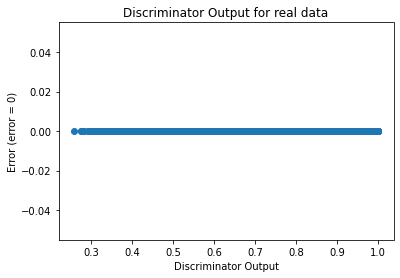

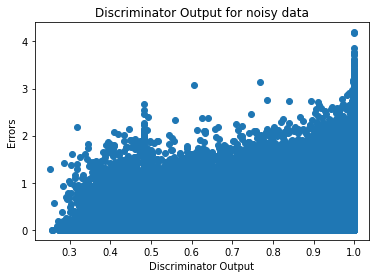

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
